# Statistics from scratch

In [1]:
%matplotlib inline
from __future__ import division # want 3 / 2 == 1.5
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial

In [2]:
from __future__ import division
from collections import Counter
from linear_algebra import sum_of_squares, dot
import math

In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/Park_Scores_2005-2014.csv')
data.head()

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


In [5]:
park_score = data['Score']

In [6]:
score = data['Score'].tolist()

# Plots

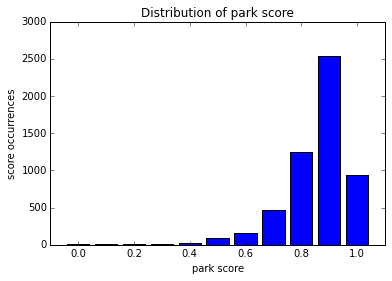

In [7]:
score_counts_rounded = lambda x: x // 0.1 * 0.1
histogram = Counter(score_counts_rounded(x) for x in score)

plt.bar([x - 0.04 for x in histogram.keys()], # shift each bar to the left by 0.4
        histogram.values(),                   # give each bar its correct height
        0.08)                                 # give each bar a width of 0.08
plt.axis([-0.1, 1.1, 0, 3000])                # x-axis from -0.1 to 1.1,
                                              # y-axis from 0 to 3000
plt.xlabel("park score")
plt.ylabel("score occurrences")
plt.title("Distribution of park score")
plt.show()

In [8]:
# multiply data by 100 to get rounded values
score_x10 = map(lambda x: x * 100, score)

# round values to nearest number 
score_x10_rounded = map(lambda x: round(x), score_x10) # decimals are still included

# round values to nearest number without decimals

# 1. remove all 'nan' values from the list in order to convert float to integer
import math
nan_removed = []
for value in score_x10_rounded:
    if not math.isnan(value):
        nan_removed.append(value)

# rename list nan_removed to rounded list
score_x10_rounded = nan_removed

# 2. convert float list to integer list
score_x10_rounded = [int(round(n, 0)) for n in score_x10_rounded]

# rename score_x10_rounded
num_score = score_x10_rounded

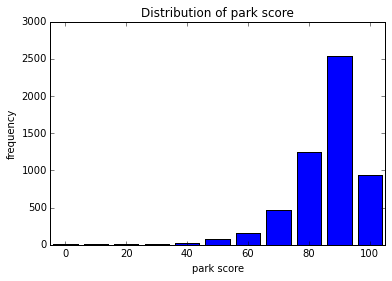

In [9]:
score_counts_rounded = lambda x: x // 10 * 10
histogram = Counter(score_counts_rounded(x) for x in score_x10)

plt.bar([x - 4 for x in histogram.keys()], # shift each bar to the left by 0.4
        histogram.values(),                # give each bar its correct height
        8)                                 # give each bar a width of 0.08
plt.axis([-5, 105, 0, 3000])               # x-axis from -0.1 to 1.1,
                                           # y-axis from 0 to 3000
plt.xlabel("park score")
plt.ylabel("frequency")
plt.title("Distribution of park score")
plt.show()

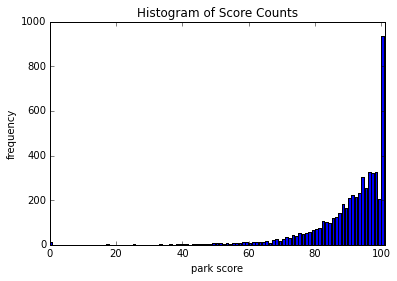

In [10]:
score_counts = Counter(num_score)
xs = range(101)
ys = [score_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0,101,0,1000])
plt.title("Histogram of Score Counts")
plt.xlabel("park score")
plt.ylabel("frequency")
plt.show()

In [11]:
def make_score_counts_histogram(plt):
    score_counts = Counter(num_score)
    xs = range(101)
    ys = [score_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,1000])
    plt.title("Histogram of Score Counts")
    plt.xlabel("park score")
    plt.ylabel("frequency")
    plt.show()

# Central tendencies

In [12]:
# number of data points
num_points = len(num_score)
num_points

5494

In [13]:
# largest value
largest_value = max(num_score)
print "largest_value: ", largest_value
# smallest value
smallest_value = min(num_score)
print "smallest_value: ", smallest_value

largest_value:  100
smallest_value:  0


In [14]:
# second smallest and largest value
# 1. sort values
sorted_values = sorted(num_score)

second_smallest_value = sorted_values[1]
print "second_smallest_value: ", second_smallest_value
second_largest_value = sorted_values[-2]
print "second_largest_value: ", second_largest_value

second_smallest_value:  0
second_largest_value:  100


In [15]:
# mean or average of the data
from __future__ import division # want 3 / 2 == 1.5

def mean(x):
    return sum(x) / len(x)

mean(num_score)

89.8403713141609

In [16]:
# median of the data = the middle most value (for an odd number of data points) 
# or the average of the two middle-most values (for an even number of data points))

def median(v):
    """finds the 'middle-most' value of v""" 
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n%2 == 1:
        # if odd, return the middle value 
        return sorted_v[midpoint]
    
    else:
        # if even, return the average of the middle values 
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

median(num_score)

93.0

In [19]:
# percentiles of the data
def quantile(x, p):
    """returns the pth-percentile value in x""" 
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print quantile(num_score, 0.10) 
print quantile(num_score, 0.25) 
print quantile(num_score, 0.75) 
print quantile(num_score, 0.90)

76
86
98
100


In [36]:
# mode: most common values
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x) # make a dictionary of each value and the count of that value
    max_count = max(counts.values()) # shows how many times the most commen value is presented
    return [x_i for x_i, count in counts.iteritems() # return all the values where the 'key' is equal to the max_count 
            if count == max_count]
mode(num_score)

[100]

# Dispersion

In [41]:
# way of measuring the spread of the dataset: e.g. range between the smallest and largest elements
def data_range(x):
    return max(x) - min(x)

data_range(num_score)

100

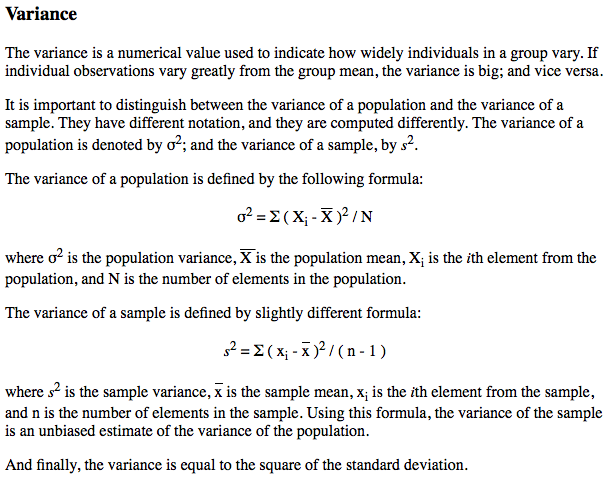

In [47]:
# other way of measuring the spread: variance of a sample
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/variance.png')

In [45]:
# 1. compute the deviation from the mean
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

# 2. compute the variance
def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

variance(num_score)

137.91134273484982

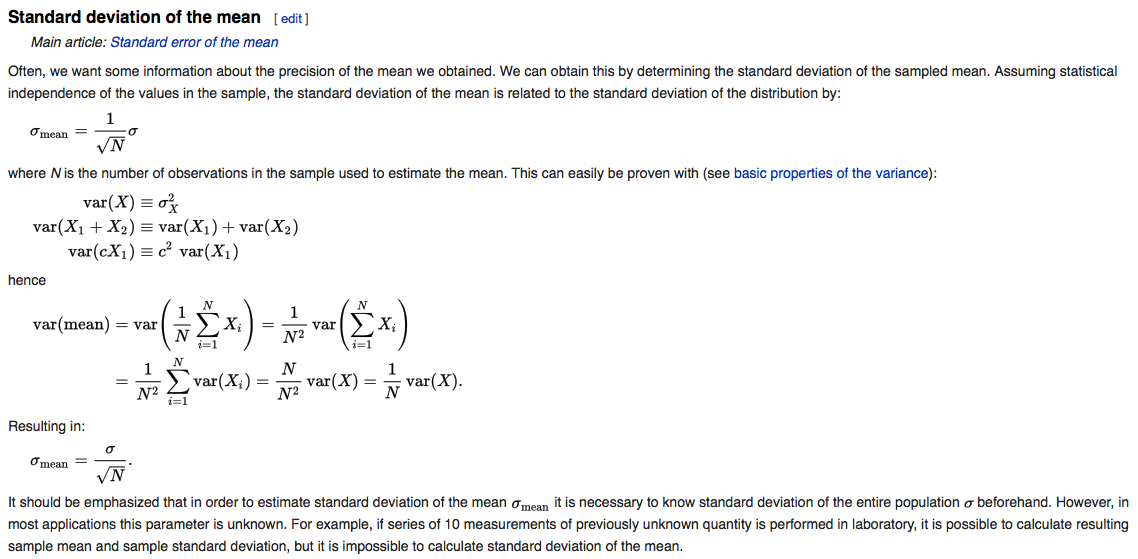

In [50]:
# standard deviation
Image(filename='/Users/annalie/Dev/data-science-from-scratch/standard-deviation-1.png')

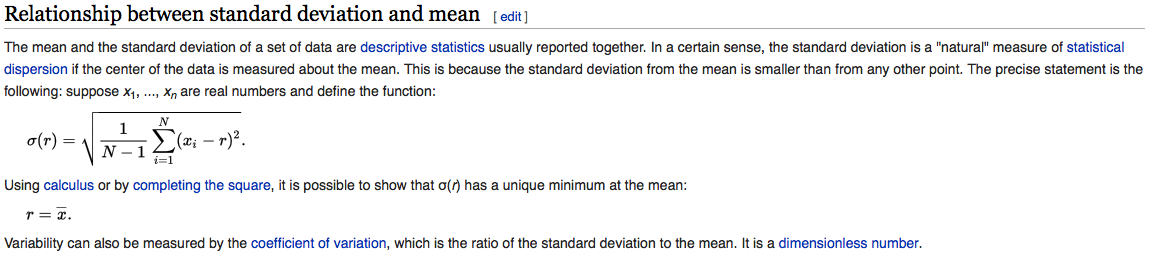

In [51]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/standard-deviation-2.png')

In [54]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_score)

11.743566014411885

In [57]:
# a more robust measure against the outlier problem is taking the difference between the 75th - 25th percentile value
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_score)

12

# Correlation

Correlation is an indicator of how much two variables are related. 
Two measures can be used for showing this association:
1. covariance: whereas variance measures how a single variable deviates from tis mean, covariance measures how two variables vary in tandem from their means.
2. correlation

In [64]:
# import another dataset: scores of restaurant violations from SF Open Data 
# https://data.sfgov.org/Health-and-Social-Services/Restaurant-Scores/stya-26eb
restaurant_data = pd.read_csv('/Users/annalie/Dev/data-science-from-scratch/violations_plus.csv')
business_id = restaurant_data['business_id'].tolist()
counts_business_id = Counter(business_id)
num_violations = counts_business_id.values()

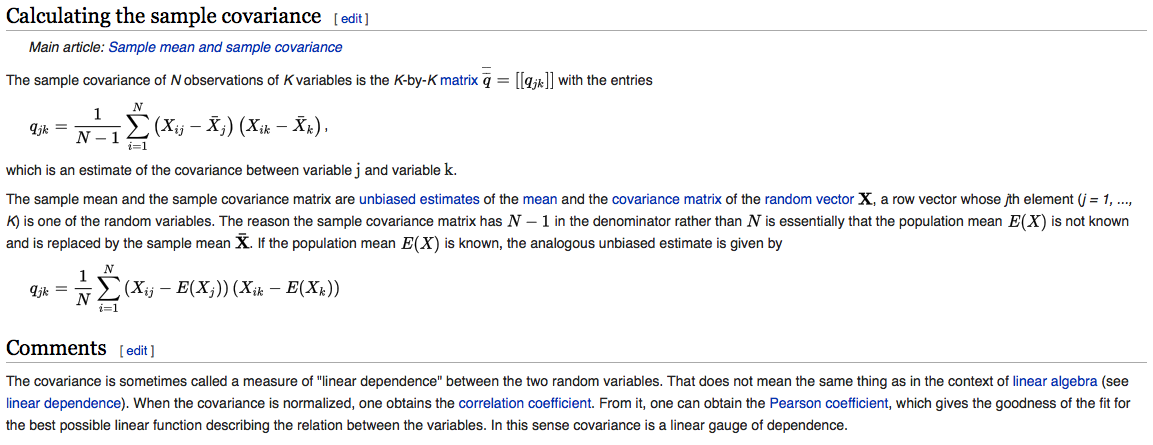

In [58]:
# covariance
Image(filename='/Users/annalie/Dev/data-science-from-scratch/covariance.png')

In [72]:
def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1) # dot sums up the products of corresponding pairs of elements

covariance(num_score, num_violations)

-1.896756718148777

In [71]:
When corresponding elements of x and y are either both above their means or both below their means, a positive number enters the sum.
When one is above its mean and the other below, a ngeative number enters the sum. 
Accordingly, a "large" positive covariance means that x tends to be large when y is large and small when y is small.
a "large" negative covariance means the opposite.
A covariance close to zero means that no such relationship exists.

However, based on the relative values it is hard to say what counts as "large" covariance.

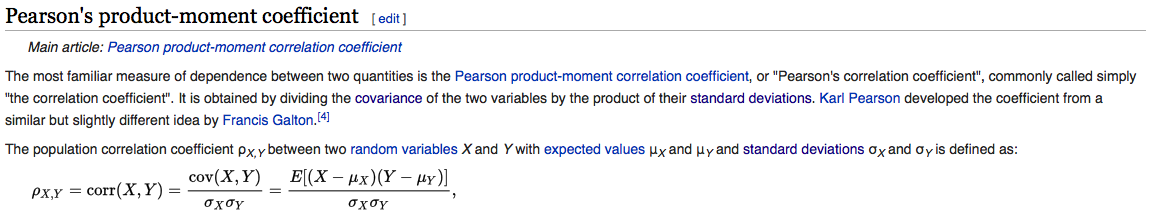

In [73]:
# correlation
# correlation divides out the standard deviations of both variables
Image(filename='/Users/annalie/Dev/data-science-from-scratch/correlation.png')

In [75]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is 0
    
correlation(num_score, num_violations)

-0.02743235662806654

In [ ]:
# check on the influence that outliers may have on the relation between two variables

In [80]:
outlier = num_friends.index(100)
num_score_good = [x
                 for i, x in enumerate(num_score)
                 if i != outlier]
num_violations_good = [x
                 for i, x in enumerate(num_violations)
                 if i != outlier]

correlation(num_score_good, num_violations_good)

-0.02751019629976117

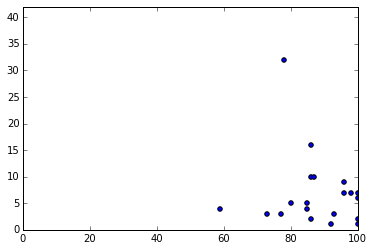

In [91]:
num_score_20 = num_score[0:20]
num_violations_20 = num_violations[0:20]

plt.scatter(num_score_20, num_violations_20)
plt.axis([0, 100, 0, 42])
plt.show()